## Implementación de control proporcional

En este programa implementaremos un control proporcional dentro de la clase `thrust_control`. Recordemos que estamos trabajando con el monorotor, asi que el error en la altura queda definido como:

$$
e = z_{\text{target}} - z
$$ 

A partir del error $e$ determinamos la entrada indirecta del sistema:

$$
\bar{u} = k_p e
$$

Finalmente convertimos la entrada indirecta a una entrada en la naturaleza del sistema:

$$
u = m(g - \bar{u})
$$


In [4]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

#%load_ext autoreload
#%autoreload 2

import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from simplified_monorotor import Monorotor
import plotting
import testing
import trajectories

#pylab.rcParams['figure.figsize'] = 10,10

> Ejercicio: implementa la función `thrust_control` del controlador de acuerdo a lo visto en la lección de control proporcional del monorotor.

In [3]:
class PController:
    # incluímos ahora la inicialización de la ganancia proporcional en el control
    def __init__(self, k_p, m):
        self.k_p = k_p 
        self.vehicle_mass = m   
        self.g = 9.81
    
    # Implementación de la función de control
    def thrust_control(self, z_target, z_actual):        
        error = None
        u = None
        return u

> Ejercicio interactivo - Explora el comportamiento del controlador

Once you see "Tests pass", your PController should be working! The code below attempts to fly the vehicle up to $z=-1$ from its start position at $z=0$ (this is also called a "step function" change in position).

Now, try playing around with the code below. Answer the following questions for yourself:

1. What do "p controlled" trajectories generally look like (when trying to follow a step function change in position)?

2. How do changes to K_P influence the resulting trajectory?

3. How robust is this controller to changes in `MASS_ERROR`? Try changing the value to 1.5 and observing the result. Compare this to the open loop plot when this parameter was just 1.01.

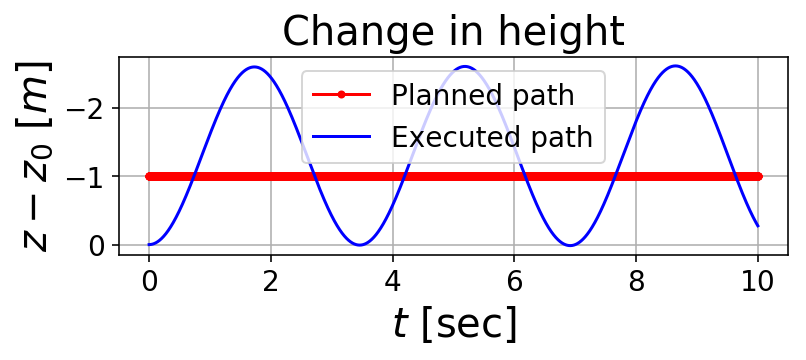

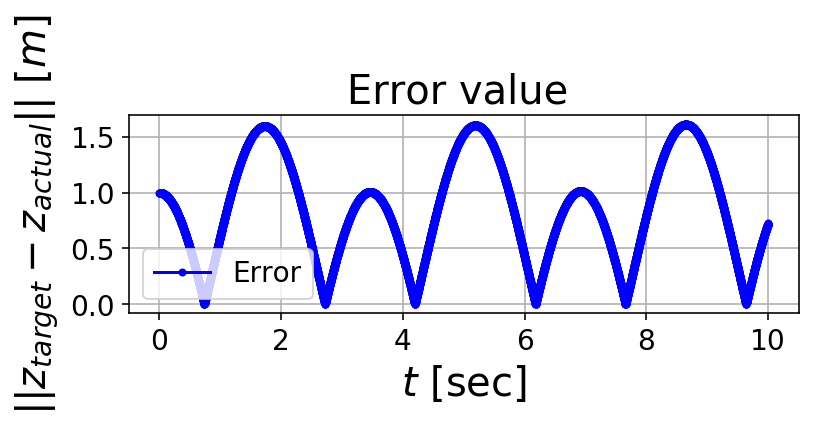

In [3]:
# Error en la estimación de la masa
MASS_ERROR = 0.1

# Ganancia proporcional
K_P = 3.0

# Inicialización
drone = Monorotor()
perceived_mass = drone.m + drone.m * MASS_ERROR
controller = PController(K_P, perceived_mass)

# Generación de la trayectoria objetivo
total_time = 10.0
dt = 0.001
t=np.linspace(0.0,total_time,int(total_time/dt))
z_path= -np.ones(t.shape[0])

# Ejecutar simulación
history = []
for z_target in z_path:
    z_actual = drone.z
    u = controller.thrust_control(z_target, z_actual)
    drone.thrust = u
    drone.advance_state(dt)
    history.append(drone.X)
    
# Generar gráficas
z_actual = [h[0] for h in history]
plotting.compare_planned_to_actual(z_actual, z_path, t)    